https://data.london.gov.uk/dataset/photovoltaic--pv--solar-panel-energy-generation-data


https://www.ofgem.gov.uk/ofgem-publications/93938/pvtoolcdrfinal-pdf

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from datetime import date, datetime
from dateutil.parser import parse

Preparing the PV data.

In [2]:
data = pd.read_csv('C:/Users/macie/Desktop/Data_Science_szkolenie/projekt/PV_Data/PV_Data _csv_files_only/2014_11_28_Cleansed_and_Processed/EXPORT_HourlyData/EXPORT_HourlyData_Customer_Endpoints.csv')

In [3]:
data

,SerialNo,Substation,datetime,t_date,t_time,d_y,d_m,d_d,d_w,t_h,...,Substation_thdVB_MIN_Filtered,Substation_thdVB_MAX_Filtered,Substation_thdVC_MIN_Filtered,Substation_thdVC_MAX_Filtered,V_MAX_Rise_vs_VA_MIN_Filtered,V_MAX_Rise_vs_VA_MAX_Filtered,V_MAX_Rise_vs_VB_MIN_Filtered,V_MAX_Rise_vs_VB_MAX_Filtered,V_MAX_Rise_vs_VC_MIN_Filtered,V_MAX_Rise_vs_VC_MAX_Filtered
0,3067E69020456129,Forest Road,2013-10-01 12:00:00,2013-10-01,12:00:00,2013,10,1,2,12,...,NaN,NaN,NaN,NaN,1.535,0.474,2.141,1.231,2.347,1.573
1,3067E69020456129,Forest Road,2013-10-01 13:00:00,2013-10-01,13:00:00,2013,10,1,2,13,...,NaN,NaN,NaN,NaN,1.997,0.404,1.988,0.969,2.381,1.458
2,3067E69020456129,Forest Road,2013-10-01 14:00:00,2013-10-01,14:00:00,2013,10,1,2,14,...,NaN,NaN,NaN,NaN,1.223,0.181,1.727,1.157,2.216,1.515
3,3067E69020456129,Forest Road,2013-10-01 15:00:00,2013-10-01,15:00:00,2013,10,1,2,15,...,NaN,NaN,NaN,NaN,3.776,-0.017,4.739,1.322,4.705,1.747
4,3067E69020456129,Forest Road,2013-10-01 16:00:00,2013-10-01,16:00:00,2013,10,1,2,16,...,NaN,NaN,NaN,NaN,1.264,-0.050,2.218,0.975,2.570,1.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52347,3067E69020456255,YMCA,2014-11-19 11:00:00,2014-11-19,11:00:00,2014,11,19,3,11,...,1.115,1.261,1.096,1.204,-0.090,-0.612,-0.088,-0.486,-1.219,-1.576
52348,3067E69020456255,YMCA,2014-11-19 12:00:00,2014-11-19,12:00:00,2014,11,19,3,12,...,1.094,1.293,1.022,1.191,-0.220,-0.680,-0.515,-0.887,-1.504,-1.895
52349,3067E69020456255,YMCA,2014-11-19 13:00:00,2014-11-19,13:00:00,2014,11,19,3,13,...,1.151,1.293,1.081,1.295,-0.016,-0.731,-0.102,-1.016,-1.158,-1.777
52350,3067E69020456255,YMCA,2014-11-19 14:00:00,2014-11-19,14:00:00,2014,11,19,3,14,...,1.153,1.249,1.096,1.193,-0.375,-1.035,-0.504,-1.429,-1.360,-2.011


In [4]:
data.groupby("Substation").count()

,SerialNo,datetime,t_date,t_time,d_y,d_m,d_d,d_w,t_h,t_m,...,Substation_thdVB_MIN_Filtered,Substation_thdVB_MAX_Filtered,Substation_thdVC_MIN_Filtered,Substation_thdVC_MAX_Filtered,V_MAX_Rise_vs_VA_MIN_Filtered,V_MAX_Rise_vs_VA_MAX_Filtered,V_MAX_Rise_vs_VB_MIN_Filtered,V_MAX_Rise_vs_VB_MAX_Filtered,V_MAX_Rise_vs_VC_MIN_Filtered,V_MAX_Rise_vs_VC_MAX_Filtered
Substation,,,,,,,,,,,,,,,,,,,,,
Alverston Close,7531,7531,7531,7531,7531,7531,7531,7531,7531,7531,...,7154,7154,7154,7154,7154,7154,7154,7154,7154,7154
Bancroft Close,8954,8954,8954,8954,8954,8954,8954,8954,8954,8954,...,5886,5886,5886,5886,8578,8578,8579,8579,8578,8578
Forest Road,7709,7709,7709,7709,7709,7709,7709,7709,7709,7709,...,4401,4401,4401,4401,6104,6106,6103,6105,6102,6104
Maple Drive East,10211,10211,10211,10211,10211,10211,10211,10211,10211,10211,...,8372,8372,8371,8371,9926,9926,9925,9925,9925,9925
Suffolk Road,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,...,6948,6948,6948,6948,8439,8439,8439,8439,8439,8439
YMCA,9466,9466,9466,9466,9466,9466,9466,9466,9466,9466,...,7388,7388,7390,7390,8172,8172,8170,8170,8172,8172


In [5]:
dataFR = data[data["Substation"]=="Forest Road"]

In [6]:
dataFR

,SerialNo,Substation,datetime,t_date,t_time,d_y,d_m,d_d,d_w,t_h,...,Substation_thdVB_MIN_Filtered,Substation_thdVB_MAX_Filtered,Substation_thdVC_MIN_Filtered,Substation_thdVC_MAX_Filtered,V_MAX_Rise_vs_VA_MIN_Filtered,V_MAX_Rise_vs_VA_MAX_Filtered,V_MAX_Rise_vs_VB_MIN_Filtered,V_MAX_Rise_vs_VB_MAX_Filtered,V_MAX_Rise_vs_VC_MIN_Filtered,V_MAX_Rise_vs_VC_MAX_Filtered
0,3067E69020456129,Forest Road,2013-10-01 12:00:00,2013-10-01,12:00:00,2013,10,1,2,12,...,NaN,NaN,NaN,NaN,1.535,0.474,2.141,1.231,2.347,1.573
1,3067E69020456129,Forest Road,2013-10-01 13:00:00,2013-10-01,13:00:00,2013,10,1,2,13,...,NaN,NaN,NaN,NaN,1.997,0.404,1.988,0.969,2.381,1.458
2,3067E69020456129,Forest Road,2013-10-01 14:00:00,2013-10-01,14:00:00,2013,10,1,2,14,...,NaN,NaN,NaN,NaN,1.223,0.181,1.727,1.157,2.216,1.515
3,3067E69020456129,Forest Road,2013-10-01 15:00:00,2013-10-01,15:00:00,2013,10,1,2,15,...,NaN,NaN,NaN,NaN,3.776,-0.017,4.739,1.322,4.705,1.747
4,3067E69020456129,Forest Road,2013-10-01 16:00:00,2013-10-01,16:00:00,2013,10,1,2,16,...,NaN,NaN,NaN,NaN,1.264,-0.050,2.218,0.975,2.570,1.350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7704,3067E69020456129,Forest Road,2014-10-03 06:00:00,2014-10-03,06:00:00,2014,10,3,5,6,...,1.852,2.096,1.714,2.175,1.742,-0.960,0.940,-1.369,0.962,-0.860
7705,3067E69020456129,Forest Road,2014-10-03 07:00:00,2014-10-03,07:00:00,2014,10,3,5,7,...,1.732,1.843,1.713,1.894,1.831,-0.276,1.787,0.084,2.078,0.388
7706,3067E69020456129,Forest Road,2014-10-03 08:00:00,2014-10-03,08:00:00,2014,10,3,5,8,...,1.771,1.918,1.701,1.898,0.940,-0.124,1.333,0.210,1.233,0.151
7707,3067E69020456129,Forest Road,2014-10-03 09:00:00,2014-10-03,09:00:00,2014,10,3,5,9,...,1.831,1.964,1.707,1.870,1.269,0.268,0.923,0.325,1.489,0.653


Checking which months were lacking of observation days and how much.

In [7]:
dataFR.groupby('d_m')['t_date'].count()

d_m
1     727
2     196
3     631
4     650
5     724
6     720
7     744
8     744
9     696
10    788
11    534
12    555
Name: t_date, dtype: int64

In [8]:
godz = pd.DataFrame({'num_hours_in_month':[744, 672, 744, 720, 744, 720, 744, 744, 720, 792, 720, 744]}, index = [1,2,3,4,5,6,7,8,9,10,11,12])

In [9]:
godz.sum()

num_hours_in_month    8808
dtype: int64

In [10]:
godz

,num_hours_in_month
1,744
2,672
3,744
4,720
5,744
6,720
7,744
8,744
9,720
10,792


In [11]:
pd.DataFrame((dataFR.groupby('d_m')['t_date'].count()/godz['num_hours_in_month']).round(2))

,0
d_m,
1,0.98
2,0.29
3,0.85
4,0.90
5,0.97
6,1.00
7,1.00
8,1.00
9,0.97


In [12]:
dataFR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709 entries, 0 to 7708
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   SerialNo                       7709 non-null   object 
 1   Substation                     7709 non-null   object 
 2   datetime                       7709 non-null   object 
 3   t_date                         7709 non-null   object 
 4   t_time                         7709 non-null   object 
 5   d_y                            7709 non-null   int64  
 6   d_m                            7709 non-null   int64  
 7   d_d                            7709 non-null   int64  
 8   d_w                            7709 non-null   int64  
 9   t_h                            7709 non-null   int64  
 10  t_m                            7709 non-null   int64  
 11  V_MIN                          7709 non-null   float64
 12  V_MIN_Filtered                 7709 non-null   f

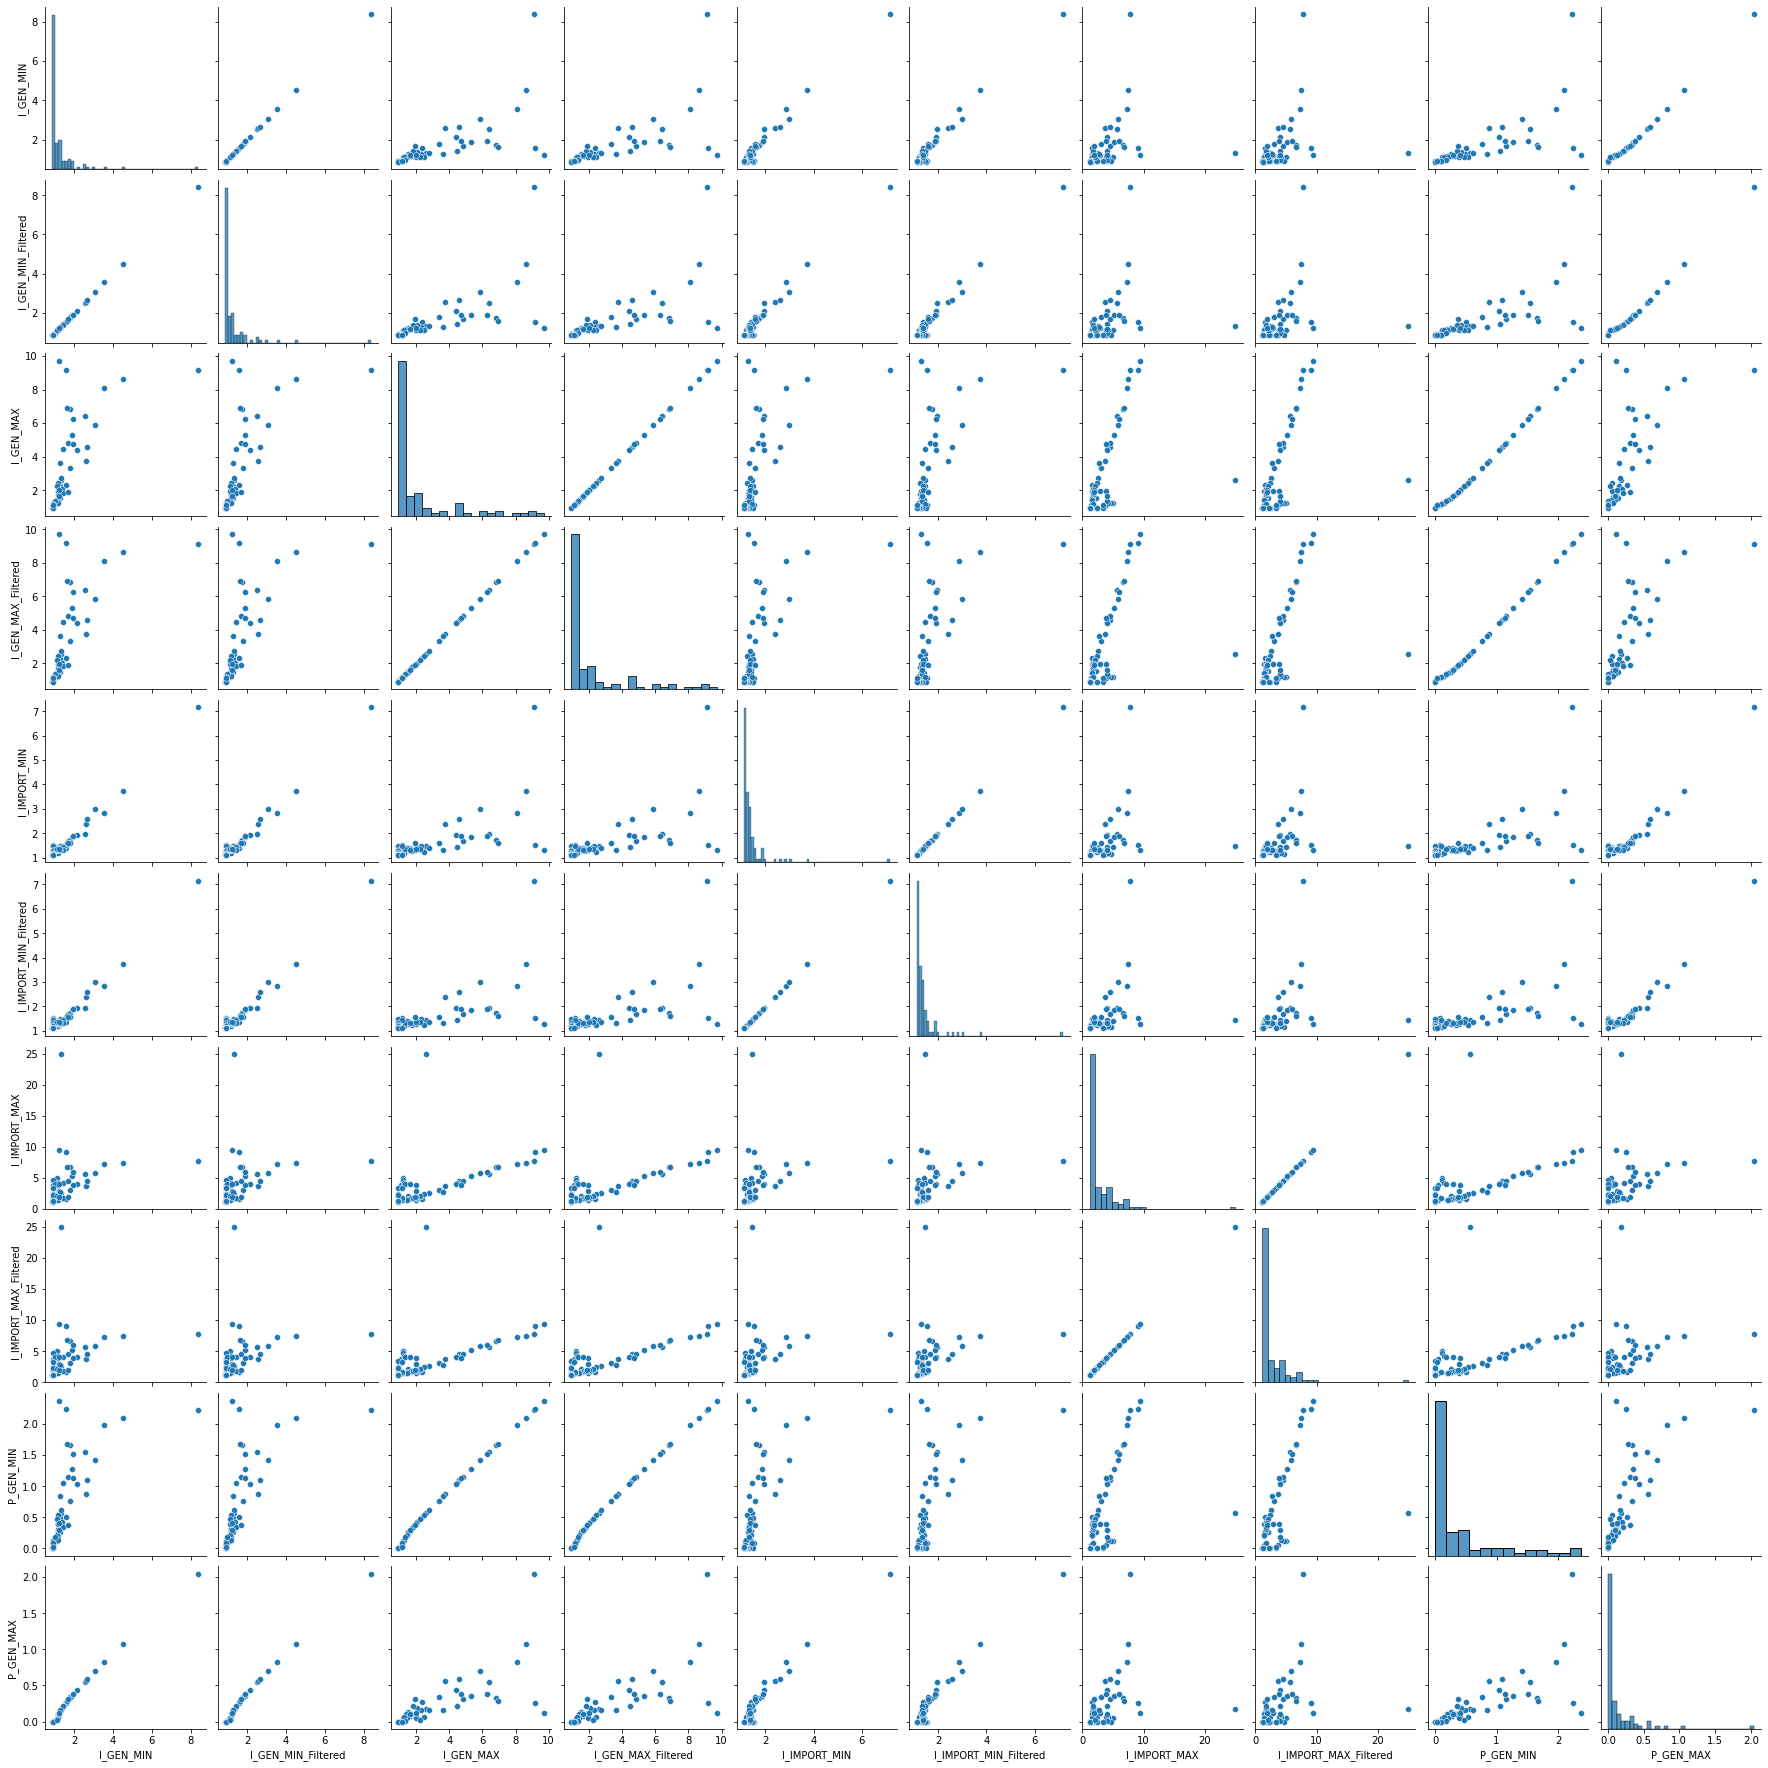

In [13]:
sns.pairplot(dataFR.iloc[:100, 15:25], dropna=True)

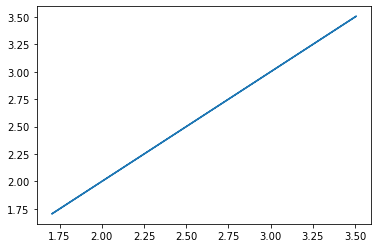

In [14]:
#plt.plot(dataFR["V_MAX"])
plt.plot(dataFR["thdV_MAX_Filtered"], dataFR["thdV_MAX"])

In [15]:
np.corrcoef(dataFR["thdV_MAX"].dropna(), dataFR["thdV_MAX_Filtered"].dropna())

array([[1., 1.],
       [1., 1.]])

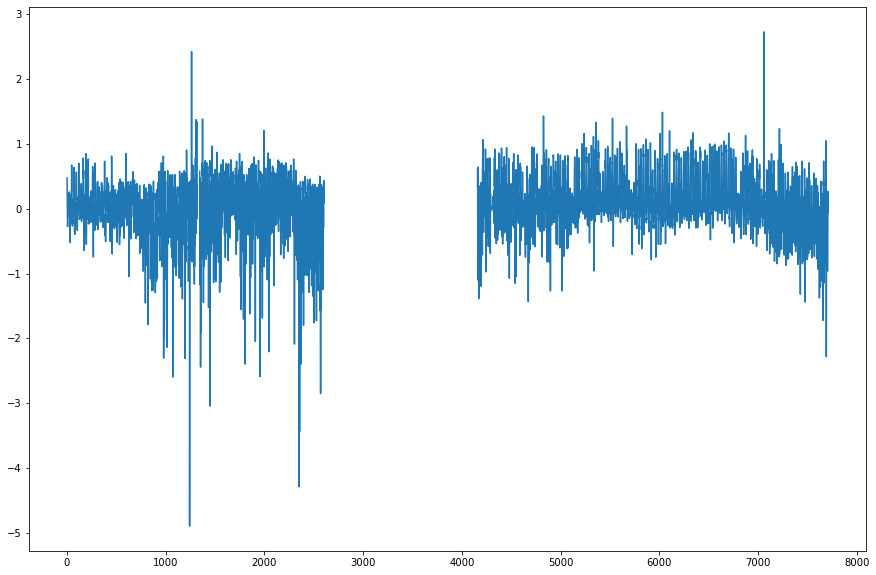

In [16]:
plt.figure(figsize=(15,10))
plt.plot(dataFR["V_MAX_Rise_vs_VA_MAX_Filtered"])
#plt.plot(dataFR["Q_IMPORT_MAX"])

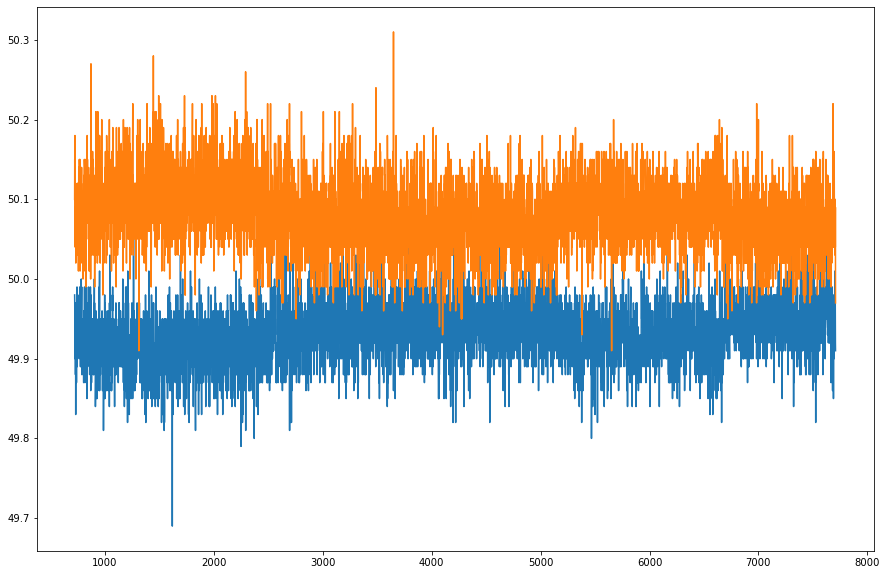

In [17]:
plt.figure(figsize=(15,10))
plt.plot(dataFR["f_min"])
plt.plot(dataFR["f_max"])

In [18]:
dataFR.loc[7708]

SerialNo                            3067E69020456129
Substation                               Forest Road
datetime                         2014-10-03 10:00:00
t_date                                    2014-10-03
t_time                                      10:00:00
                                        ...         
V_MAX_Rise_vs_VA_MAX_Filtered                 -0.064
V_MAX_Rise_vs_VB_MIN_Filtered                  1.266
V_MAX_Rise_vs_VB_MAX_Filtered                    0.8
V_MAX_Rise_vs_VC_MIN_Filtered                  1.398
V_MAX_Rise_vs_VC_MAX_Filtered                  0.622
Name: 7708, Length: 63, dtype: object

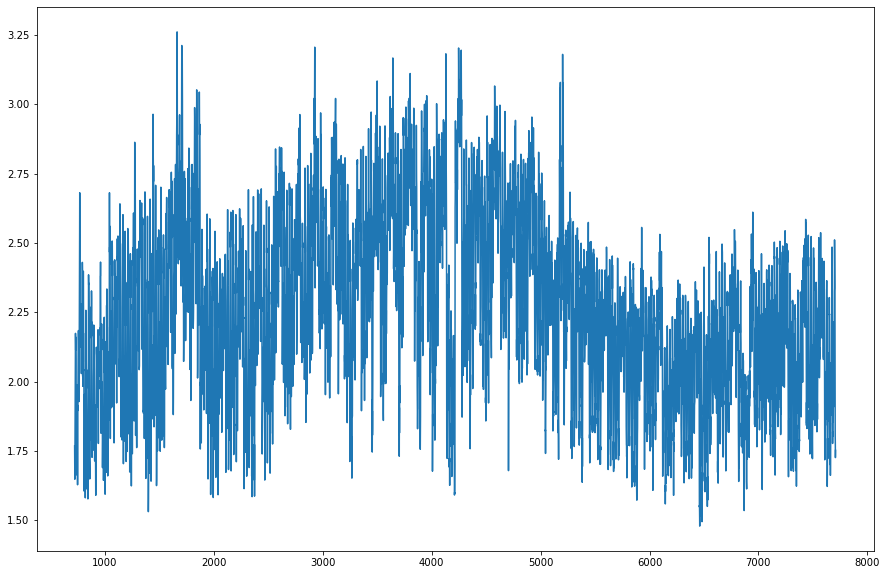

In [19]:
plt.figure(figsize=(15,10))
plt.plot(dataFR["thdV_MIN"])
#plt.plot(dataFR["V_MAX"])

In [20]:
dataFR.head()

,SerialNo,Substation,datetime,t_date,t_time,d_y,d_m,d_d,d_w,t_h,...,Substation_thdVB_MIN_Filtered,Substation_thdVB_MAX_Filtered,Substation_thdVC_MIN_Filtered,Substation_thdVC_MAX_Filtered,V_MAX_Rise_vs_VA_MIN_Filtered,V_MAX_Rise_vs_VA_MAX_Filtered,V_MAX_Rise_vs_VB_MIN_Filtered,V_MAX_Rise_vs_VB_MAX_Filtered,V_MAX_Rise_vs_VC_MIN_Filtered,V_MAX_Rise_vs_VC_MAX_Filtered
0,3067E69020456129,Forest Road,2013-10-01 12:00:00,2013-10-01,12:00:00,2013,10,1,2,12,...,NaN,NaN,NaN,NaN,1.535,0.474,2.141,1.231,2.347,1.573
1,3067E69020456129,Forest Road,2013-10-01 13:00:00,2013-10-01,13:00:00,2013,10,1,2,13,...,NaN,NaN,NaN,NaN,1.997,0.404,1.988,0.969,2.381,1.458
2,3067E69020456129,Forest Road,2013-10-01 14:00:00,2013-10-01,14:00:00,2013,10,1,2,14,...,NaN,NaN,NaN,NaN,1.223,0.181,1.727,1.157,2.216,1.515
3,3067E69020456129,Forest Road,2013-10-01 15:00:00,2013-10-01,15:00:00,2013,10,1,2,15,...,NaN,NaN,NaN,NaN,3.776,-0.017,4.739,1.322,4.705,1.747
4,3067E69020456129,Forest Road,2013-10-01 16:00:00,2013-10-01,16:00:00,2013,10,1,2,16,...,NaN,NaN,NaN,NaN,1.264,-0.050,2.218,0.975,2.570,1.350


In [21]:
dataFR["t_time"][0]

'12:00:00'

Unification of time format in dataFR with weather data

In [22]:
dataFR['Time'] = dataFR["t_time"].copy()

<ipython-input-22-58c1639e9adf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFR['Time'] = dataFR["t_time"].copy()


In [23]:
for i in range(dataFR.shape[0]):
    dataFR["Time"][i] = datetime.strptime(dataFR["t_time"][i], '%H:%M:%S').strftime('%I:%M %p')

<ipython-input-23-3c7f9e7a739c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFR["Time"][i] = datetime.strptime(dataFR["t_time"][i], '%H:%M:%S').strftime('%I:%M %p')
C:\Users\macie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3343: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
dataFR["t_time"].loc[0:20]

0     12:00:00
1     13:00:00
2     14:00:00
3     15:00:00
4     16:00:00
5     17:00:00
6     18:00:00
7     19:00:00
8     20:00:00
9     21:00:00
10    22:00:00
11    23:00:00
12    00:00:00
13    01:00:00
14    02:00:00
15    03:00:00
16    04:00:00
17    05:00:00
18    06:00:00
19    07:00:00
20    08:00:00
Name: t_time, dtype: object

In [25]:
dataFR['Time'].loc[0:20]

0     12:00 PM
1     01:00 PM
2     02:00 PM
3     03:00 PM
4     04:00 PM
5     05:00 PM
6     06:00 PM
7     07:00 PM
8     08:00 PM
9     09:00 PM
10    10:00 PM
11    11:00 PM
12    12:00 AM
13    01:00 AM
14    02:00 AM
15    03:00 AM
16    04:00 AM
17    05:00 AM
18    06:00 AM
19    07:00 AM
20    08:00 AM
Name: Time, dtype: object

Moving the new column 'Time' to the front.

In [26]:
cols = dataFR.columns.tolist()
cols = cols[:3] + cols[-1:] + cols[3:-1]
cols

['SerialNo',
 'Substation',
 'datetime',
 'Time',
 't_date',
 't_time',
 'd_y',
 'd_m',
 'd_d',
 'd_w',
 't_h',
 't_m',
 'V_MIN',
 'V_MIN_Filtered',
 'V_MAX',
 'V_MAX_Filtered',
 'I_GEN_MIN',
 'I_GEN_MIN_Filtered',
 'I_GEN_MAX',
 'I_GEN_MAX_Filtered',
 'I_IMPORT_MIN',
 'I_IMPORT_MIN_Filtered',
 'I_IMPORT_MAX',
 'I_IMPORT_MAX_Filtered',
 'P_GEN_MIN',
 'P_GEN_MAX',
 'P_IMPORT_MIN',
 'P_IMPORT_MAX',
 'Q_GEN_MIN',
 'Q_GEN_MAX',
 'Q_IMPORT_MIN',
 'Q_IMPORT_MAX',
 'S_GEN_MIN',
 'S_GEN_MAX',
 'S_IMPORT_MIN',
 'S_IMPORT_MAX',
 'thdV_MIN',
 'thdV_MIN_Filtered',
 'thdV_MAX',
 'thdV_MAX_Filtered',
 'thdI_GEN_MIN',
 'thdI_GEN_MAX',
 'thdI_IMPORT_MIN',
 'thdI_IMPORT_MAX',
 'f_min',
 'f_max',
 'Substation_VA_MIN_Filtered',
 'Substation_VA_MAX_Filtered',
 'Substation_VB_MIN_Filtered',
 'Substation_VB_MAX_Filtered',
 'Substation_VC_MIN_Filtered',
 'Substation_VC_MAX_Filtered',
 'Substation_thdVA_MIN_Filtered',
 'Substation_thdVA_MAX_Filtered',
 'Substation_thdVB_MIN_Filtered',
 'Substation_thdVB_MAX_F

In [27]:
dataFR_new = dataFR[cols]

In [28]:
dataFR_new.drop(columns=["SerialNo","t_time","t_date" ,"d_y", "d_d", "d_w","t_h", "t_m", "V_MIN_Filtered", "V_MAX_Filtered", "I_GEN_MIN_Filtered", "I_GEN_MAX_Filtered", "I_IMPORT_MIN_Filtered", "I_IMPORT_MAX_Filtered", "thdV_MIN_Filtered", "thdV_MAX_Filtered"], inplace = True)

C:\Users\macie\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
dataFR_new.drop(columns=['Substation_thdVA_MIN_Filtered', 'Substation_thdVA_MAX_Filtered',
       'Substation_thdVB_MIN_Filtered', 'Substation_thdVB_MAX_Filtered',
       'Substation_thdVC_MIN_Filtered', 'Substation_thdVC_MAX_Filtered',
       'V_MAX_Rise_vs_VA_MIN_Filtered', 'V_MAX_Rise_vs_VA_MAX_Filtered',
       'V_MAX_Rise_vs_VB_MIN_Filtered', 'V_MAX_Rise_vs_VB_MAX_Filtered',
       'V_MAX_Rise_vs_VC_MIN_Filtered', 'V_MAX_Rise_vs_VC_MAX_Filtered'], inplace=True)

In [30]:
dataFR_new.drop(columns=['Substation_VA_MIN_Filtered', 'Substation_VA_MAX_Filtered',
       'Substation_VB_MIN_Filtered', 'Substation_VB_MAX_Filtered',
       'Substation_VC_MIN_Filtered', 'Substation_VC_MAX_Filtered'], inplace = True)

In [31]:
dataFR_new.head()

,Substation,datetime,Time,d_m,V_MIN,V_MAX,I_GEN_MIN,I_GEN_MAX,I_IMPORT_MIN,I_IMPORT_MAX,...,S_IMPORT_MIN,S_IMPORT_MAX,thdV_MIN,thdV_MAX,thdI_GEN_MIN,thdI_GEN_MAX,thdI_IMPORT_MIN,thdI_IMPORT_MAX,f_min,f_max
0,Forest Road,2013-10-01 12:00:00,12:00 PM,10,245.697,246.249,8.391,9.145,7.157,7.727,...,1.762,1.898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Forest Road,2013-10-01 13:00:00,01:00 PM,10,244.141,245.951,4.514,8.635,3.734,7.415,...,0.913,1.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Forest Road,2013-10-01 14:00:00,02:00 PM,10,244.472,246.015,3.548,8.115,2.844,7.279,...,0.698,1.788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Forest Road,2013-10-01 15:00:00,03:00 PM,10,242.194,246.492,2.520,6.409,1.952,5.598,...,0.472,1.376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Forest Road,2013-10-01 16:00:00,04:00 PM,10,243.712,245.211,1.552,2.335,1.382,1.642,...,0.337,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Unification of location column in dataFR and weather data.

In [32]:
dataFR_new["Site"] = dataFR_new["Substation"].copy()

<ipython-input-32-b597e9fd8a99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFR_new["Site"] = dataFR_new["Substation"].copy()


In [33]:
dataFR_new.head()

,Substation,datetime,Time,d_m,V_MIN,V_MAX,I_GEN_MIN,I_GEN_MAX,I_IMPORT_MIN,I_IMPORT_MAX,...,S_IMPORT_MAX,thdV_MIN,thdV_MAX,thdI_GEN_MIN,thdI_GEN_MAX,thdI_IMPORT_MIN,thdI_IMPORT_MAX,f_min,f_max,Site
0,Forest Road,2013-10-01 12:00:00,12:00 PM,10,245.697,246.249,8.391,9.145,7.157,7.727,...,1.898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Road
1,Forest Road,2013-10-01 13:00:00,01:00 PM,10,244.141,245.951,4.514,8.635,3.734,7.415,...,1.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Road
2,Forest Road,2013-10-01 14:00:00,02:00 PM,10,244.472,246.015,3.548,8.115,2.844,7.279,...,1.788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Road
3,Forest Road,2013-10-01 15:00:00,03:00 PM,10,242.194,246.492,2.520,6.409,1.952,5.598,...,1.376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Road
4,Forest Road,2013-10-01 16:00:00,04:00 PM,10,243.712,245.211,1.552,2.335,1.382,1.642,...,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Forest Road


In [34]:
cols = dataFR_new.columns.tolist()
cols

['Substation',
 'datetime',
 'Time',
 'd_m',
 'V_MIN',
 'V_MAX',
 'I_GEN_MIN',
 'I_GEN_MAX',
 'I_IMPORT_MIN',
 'I_IMPORT_MAX',
 'P_GEN_MIN',
 'P_GEN_MAX',
 'P_IMPORT_MIN',
 'P_IMPORT_MAX',
 'Q_GEN_MIN',
 'Q_GEN_MAX',
 'Q_IMPORT_MIN',
 'Q_IMPORT_MAX',
 'S_GEN_MIN',
 'S_GEN_MAX',
 'S_IMPORT_MIN',
 'S_IMPORT_MAX',
 'thdV_MIN',
 'thdV_MAX',
 'thdI_GEN_MIN',
 'thdI_GEN_MAX',
 'thdI_IMPORT_MIN',
 'thdI_IMPORT_MAX',
 'f_min',
 'f_max',
 'Site']

In [35]:
cols = cols[-1:] + cols[1:-1]
cols

['Site',
 'datetime',
 'Time',
 'd_m',
 'V_MIN',
 'V_MAX',
 'I_GEN_MIN',
 'I_GEN_MAX',
 'I_IMPORT_MIN',
 'I_IMPORT_MAX',
 'P_GEN_MIN',
 'P_GEN_MAX',
 'P_IMPORT_MIN',
 'P_IMPORT_MAX',
 'Q_GEN_MIN',
 'Q_GEN_MAX',
 'Q_IMPORT_MIN',
 'Q_IMPORT_MAX',
 'S_GEN_MIN',
 'S_GEN_MAX',
 'S_IMPORT_MIN',
 'S_IMPORT_MAX',
 'thdV_MIN',
 'thdV_MAX',
 'thdI_GEN_MIN',
 'thdI_GEN_MAX',
 'thdI_IMPORT_MIN',
 'thdI_IMPORT_MAX',
 'f_min',
 'f_max']

In [36]:
dataFR_new = dataFR_new[cols]

In [37]:
dataFR_new.head()

,Site,datetime,Time,d_m,V_MIN,V_MAX,I_GEN_MIN,I_GEN_MAX,I_IMPORT_MIN,I_IMPORT_MAX,...,S_IMPORT_MIN,S_IMPORT_MAX,thdV_MIN,thdV_MAX,thdI_GEN_MIN,thdI_GEN_MAX,thdI_IMPORT_MIN,thdI_IMPORT_MAX,f_min,f_max
0,Forest Road,2013-10-01 12:00:00,12:00 PM,10,245.697,246.249,8.391,9.145,7.157,7.727,...,1.762,1.898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Forest Road,2013-10-01 13:00:00,01:00 PM,10,244.141,245.951,4.514,8.635,3.734,7.415,...,0.913,1.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Forest Road,2013-10-01 14:00:00,02:00 PM,10,244.472,246.015,3.548,8.115,2.844,7.279,...,0.698,1.788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Forest Road,2013-10-01 15:00:00,03:00 PM,10,242.194,246.492,2.520,6.409,1.952,5.598,...,0.472,1.376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Forest Road,2013-10-01 16:00:00,04:00 PM,10,243.712,245.211,1.552,2.335,1.382,1.642,...,0.337,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
parse('2013-10-01 12:00 PM')

datetime.datetime(2013, 10, 1, 12, 0)

In [39]:
dataFR_new.datetime.loc[0]

'2013-10-01 12:00:00'

In [40]:
parse(dataFR_new.datetime.loc[0])

datetime.datetime(2013, 10, 1, 12, 0)

In [41]:
for i in range(dataFR_new.shape[0]):
    dataFR_new["datetime"][i] = parse(dataFR_new["datetime"][i])

<ipython-input-41-10a976b1ce7a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFR_new["datetime"][i] = parse(dataFR_new["datetime"][i])


In [42]:
dataFR_new.datetime[1]

datetime.datetime(2013, 10, 1, 13, 0)

In [43]:
dataFR_new.head()

,Site,datetime,Time,d_m,V_MIN,V_MAX,I_GEN_MIN,I_GEN_MAX,I_IMPORT_MIN,I_IMPORT_MAX,...,S_IMPORT_MIN,S_IMPORT_MAX,thdV_MIN,thdV_MAX,thdI_GEN_MIN,thdI_GEN_MAX,thdI_IMPORT_MIN,thdI_IMPORT_MAX,f_min,f_max
0,Forest Road,2013-10-01 12:00:00,12:00 PM,10,245.697,246.249,8.391,9.145,7.157,7.727,...,1.762,1.898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Forest Road,2013-10-01 13:00:00,01:00 PM,10,244.141,245.951,4.514,8.635,3.734,7.415,...,0.913,1.820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Forest Road,2013-10-01 14:00:00,02:00 PM,10,244.472,246.015,3.548,8.115,2.844,7.279,...,0.698,1.788,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Forest Road,2013-10-01 15:00:00,03:00 PM,10,242.194,246.492,2.520,6.409,1.952,5.598,...,0.472,1.376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Forest Road,2013-10-01 16:00:00,04:00 PM,10,243.712,245.211,1.552,2.335,1.382,1.642,...,0.337,0.400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dataFR_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7709 entries, 0 to 7708
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site             7709 non-null   object 
 1   datetime         7709 non-null   object 
 2   Time             7709 non-null   object 
 3   d_m              7709 non-null   int64  
 4   V_MIN            7709 non-null   float64
 5   V_MAX            7709 non-null   float64
 6   I_GEN_MIN        7709 non-null   float64
 7   I_GEN_MAX        7709 non-null   float64
 8   I_IMPORT_MIN     7709 non-null   float64
 9   I_IMPORT_MAX     7709 non-null   float64
 10  P_GEN_MIN        7709 non-null   float64
 11  P_GEN_MAX        7709 non-null   float64
 12  P_IMPORT_MIN     7709 non-null   float64
 13  P_IMPORT_MAX     7709 non-null   float64
 14  Q_GEN_MIN        7709 non-null   float64
 15  Q_GEN_MAX        7709 non-null   float64
 16  Q_IMPORT_MIN     7709 non-null   float64
 17  Q_IMPORT_MAX  

Preparing the weather data.

In [45]:
weather = pd.read_csv("./Weather_Data_2014_11_30.csv")

C:\Users\macie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5,6,7,8,9,15,16,17,22,23,24,25,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [46]:
weather.head(10)

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,YMCA,07.01.2014,1,2:30 PM,14,10.6,10.6,10.4,84,8,...,50,6.8,16.3,9.39,0.0739,0.00,385,1,56.3,30
1,YMCA,07.01.2014,1,3:00 PM,15,10.7,10.8,10.6,83,7.9,...,50,6.8,16.2,9.39,0.0740,0.03,702,1,100.0,30
2,YMCA,07.01.2014,1,3:30 PM,15,10.7,10.8,10.7,81,7.6,...,50,6.6,16.1,9.39,0.0740,0.00,703,1,100.0,30
3,YMCA,07.01.2014,1,4:00 PM,16,10.4,10.7,10.3,82,7.4,...,50,6.6,16.1,9.39,0.0741,0.03,702,1,100.0,30
4,YMCA,07.01.2014,1,4:30 PM,16,10.3,10.4,10.3,84,7.7,...,50,6.3,15.8,9.40,0.0742,0.00,703,1,100.0,30
5,YMCA,07.01.2014,1,5:00 PM,17,10.3,10.4,10.3,83,7.6,...,50,6.1,15.6,9.41,0.0742,0.00,702,1,100.0,30
6,YMCA,07.01.2014,1,5:30 PM,17,10.2,10.4,10.2,84,7.6,...,50,6.1,15.5,9.41,0.0743,0.03,703,1,100.0,30
7,YMCA,07.01.2014,1,6:00 PM,18,10.2,10.3,10.2,85,7.8,...,50,5.9,15.3,9.42,0.0743,0.03,702,1,100.0,30
8,YMCA,07.01.2014,1,6:30 PM,18,10,10.2,10,86,7.8,...,50,5.8,15.2,9.42,0.0744,0.00,703,1,100.0,30
9,YMCA,07.01.2014,1,7:00 PM,19,9.8,10.1,9.8,87,7.7,...,51,6.0,15.1,9.63,0.0745,0.00,702,1,100.0,30


In [47]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69480 entries, 0 to 69479
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Site          69480 non-null  object 
 1   Date          69480 non-null  object 
 2   Month         69480 non-null  int64  
 3   Time          69480 non-null  object 
 4   Hour          69480 non-null  object 
 5   TempOut       69480 non-null  object 
 6   HiTemp        69480 non-null  object 
 7   LowTemp       69480 non-null  object 
 8   OutHum        69480 non-null  object 
 9   DewPt         69480 non-null  object 
 10  WindSpeed     69480 non-null  int64  
 11  WindDir       69480 non-null  object 
 12  WindRun       69480 non-null  float64
 13  HiSpeed       69480 non-null  int64  
 14  HiDir         69480 non-null  object 
 15  WindChill     69480 non-null  object 
 16  HeatIndex     69480 non-null  object 
 17  THWIndex      69480 non-null  object 
 18  THSWIndex     69480 non-nu

In [48]:
weather.groupby('Site').count()

,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
Site,,,,,,,,,,,,,,,,,,,,,
Easthill Road,9767,9767,9767,9767,9767,9767,9767,9767,9767,9767,...,9767,9767,9767,9767,9767,9767,9767,9767,9767,9767
Elm Crescent,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293,...,14293,14293,14293,14293,14293,14293,14293,14293,14293,14293
Forest Road,14625,14625,14625,14625,14625,14625,14625,14625,14625,14625,...,14625,14625,14625,14625,14625,14625,14625,14625,14625,14625
Maple Drive East,15098,15098,15098,15098,15098,15098,15098,15098,15098,15098,...,15098,15098,15098,15098,15098,15098,15098,15098,15098,15098
YMCA,15697,15697,15697,15697,15697,15697,15697,15697,15697,15697,...,15697,15697,15697,15697,15697,15697,15697,15697,15697,15697


In [49]:
weather.describe()

,Month,WindSpeed,WindRun,HiSpeed,Bar,Rain,RainRate,InTemp,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
count,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000,69480.000000
mean,6.030656,1.633679,0.816830,6.009643,755.503849,0.024919,0.616043,20.441651,43.737507,7.068602,19.598611,8.339832,0.073918,0.032490,684.454807,1.312550,97.526770,29.989925
std,3.167577,2.022863,1.011436,5.085896,8.054921,0.669722,28.634610,7.004969,10.887876,4.271390,7.219476,1.845071,0.001881,0.079804,107.960116,0.819499,15.366705,0.448774
min,1.000000,0.000000,0.000000,0.000000,727.000000,0.000000,0.000000,3.200000,15.000000,-5.800000,2.700000,3.150000,0.065500,0.000000,0.000000,1.000000,0.000000,10.000000
25%,3.000000,0.000000,0.000000,2.000000,750.600000,0.000000,0.000000,15.300000,35.000000,3.900000,14.200000,6.890000,0.072700,0.000000,702.000000,1.000000,100.000000,30.000000
50%,6.000000,1.000000,0.500000,5.000000,756.300000,0.000000,0.000000,19.900000,45.000000,7.100000,18.900000,8.610000,0.074000,0.000000,702.000000,1.000000,100.000000,30.000000
75%,9.000000,3.000000,1.500000,9.000000,761.200000,0.000000,0.000000,24.700000,52.000000,10.100000,24.300000,9.750000,0.075100,0.030000,703.000000,1.000000,100.000000,30.000000
max,12.000000,18.000000,9.000000,42.000000,776.800000,93.220000,2090.200000,51.600000,68.000000,23.800000,63.000000,12.800000,0.079700,0.630000,1053.000000,8.000000,100.000000,30.000000


In [50]:
weatherFR = weather[weather["Site"]=="Forest Road"]

In [51]:
weatherFR

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
30795,Forest Road,09.12.2013,12,10:00 PM,22,4.8,5,4.8,95,4.1,...,56,3.2,10.9,10.41,0.0779,0.00,464,1,67.8,30
30796,Forest Road,09.12.2013,12,10:30 PM,22,4.8,4.9,4.8,94,3.9,...,56,3.0,10.8,10.40,0.0780,0.00,702,1,100.0,30
30797,Forest Road,09.12.2013,12,11:00 PM,23,4.3,4.9,4.3,95,3.6,...,56,2.9,10.7,10.40,0.0780,0.00,703,1,100.0,30
30798,Forest Road,09.12.2013,12,11:30 PM,23,4.1,4.3,4,95,3.3,...,56,2.8,10.6,10.39,0.0780,0.00,702,1,100.0,30
30799,Forest Road,10.12.2013,12,12:00 AM,-,4.1,4.2,4.1,95,3.4,...,56,2.7,10.5,10.39,0.0780,0.00,703,1,100.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45415,Forest Road,17.11.2014,11,10:30 AM,10,9.1,9.1,8.8,91,7.7,...,60,5.8,12.7,11.07,0.0751,0.03,703,1,100.0,30
45416,Forest Road,17.11.2014,11,11:00 AM,11,9.8,9.8,9.1,89,8.1,...,61,6.2,12.9,11.25,0.0750,0.08,702,1,100.0,30
45417,Forest Road,17.11.2014,11,11:30 AM,11,12,12,9.8,81,8.8,...,61,6.3,13.1,11.25,0.0750,0.00,702,1,100.0,30
45418,Forest Road,17.11.2014,11,12:00 PM,12,12.1,12.2,11.9,80,8.8,...,61,6.5,13.2,11.25,0.0749,0.15,703,1,100.0,30


Checking which months were lacking of observation days and how much.

In [52]:
weatherFR.groupby('Month')['Hour'].count()

Month
1     1487
2      626
3      401
4     1440
5     1481
6     1435
7     1486
8     1488
9     1439
10    1488
11     794
12    1060
Name: Hour, dtype: int64

In [53]:
weatherFR[['Month','Hour']].loc[45380:45450]

,Month,Hour
45380,11,17
45381,11,17
45382,11,18
45383,11,18
45384,11,19
45385,11,19
45386,11,20
45387,11,20
45388,11,21
45389,11,21


Defining data farme with number of half_hours if no data is missing during the measurment time.

In [54]:
godz2 = pd.DataFrame({'num_half_hours_in_month':[1488, 1344, 1488, 1440, 1488, 1440, 1488, 1488, 1440, 1488, 792, 1060]}, index = [1,2,3,4,5,6,7,8,9,10,11,12])

In [55]:
godz2.sum()

num_half_hours_in_month    16444
dtype: int64

In [56]:
godz2

,num_half_hours_in_month
1,1488
2,1344
3,1488
4,1440
5,1488
6,1440
7,1488
8,1488
9,1440
10,1488


The data frame with the rate of number of records for a certain month to the number of half_hours for this period of time.

In [57]:
pd.DataFrame(weatherFR.groupby('Month')['Hour'].count()/godz2['num_half_hours_in_month']).round(2)

,0
Month,
1,1.00
2,0.47
3,0.27
4,1.00
5,1.00
6,1.00
7,1.00
8,1.00
9,1.00


In [58]:
weatherFR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14625 entries, 30795 to 45419
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Site          14625 non-null  object 
 1   Date          14625 non-null  object 
 2   Month         14625 non-null  int64  
 3   Time          14625 non-null  object 
 4   Hour          14625 non-null  object 
 5   TempOut       14625 non-null  object 
 6   HiTemp        14625 non-null  object 
 7   LowTemp       14625 non-null  object 
 8   OutHum        14625 non-null  object 
 9   DewPt         14625 non-null  object 
 10  WindSpeed     14625 non-null  int64  
 11  WindDir       14625 non-null  object 
 12  WindRun       14625 non-null  float64
 13  HiSpeed       14625 non-null  int64  
 14  HiDir         14625 non-null  object 
 15  WindChill     14625 non-null  object 
 16  HeatIndex     14625 non-null  object 
 17  THWIndex      14625 non-null  object 
 18  THSWIndex     14625 no

There is an additional category of HiWind and WindDir which probably is related to no wind conditions ('---').

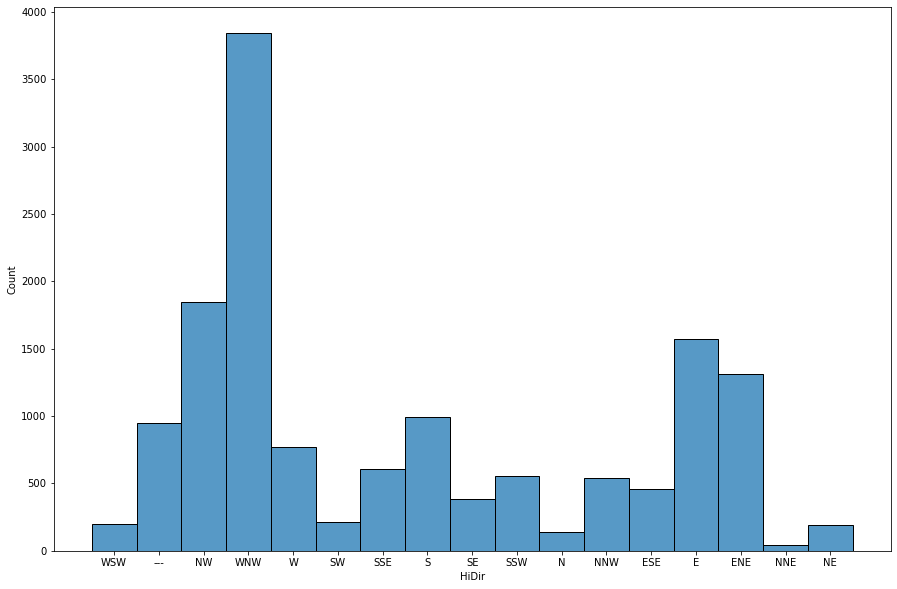

In [59]:
plt.figure(figsize=(15,10))
sns.histplot(weatherFR["HiDir"])

In [60]:
weatherFR[weatherFR['HiDir']=='---'].count()

Site            952
Date            952
Month           952
Time            952
Hour            952
TempOut         952
HiTemp          952
LowTemp         952
OutHum          952
DewPt           952
WindSpeed       952
WindDir         952
WindRun         952
HiSpeed         952
HiDir           952
WindChill       952
HeatIndex       952
THWIndex        952
THSWIndex       952
Bar             952
Rain            952
RainRate        952
SolarRad        952
SolarEnergy     952
HiSolarRad      952
HeatD-D         952
CoolD-D         952
InTemp          952
InHum           952
InDew           952
InHeat          952
InEMC           952
InAirDensity    952
ET              952
WindSamp        952
WindTx          952
ISSRecept       952
ArcInt          952
dtype: int64

In [61]:
weatherFR.head()

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
30795,Forest Road,09.12.2013,12,10:00 PM,22,4.8,5,4.8,95,4.1,...,56,3.2,10.9,10.41,0.0779,0.0,464,1,67.8,30
30796,Forest Road,09.12.2013,12,10:30 PM,22,4.8,4.9,4.8,94,3.9,...,56,3.0,10.8,10.40,0.0780,0.0,702,1,100.0,30
30797,Forest Road,09.12.2013,12,11:00 PM,23,4.3,4.9,4.3,95,3.6,...,56,2.9,10.7,10.40,0.0780,0.0,703,1,100.0,30
30798,Forest Road,09.12.2013,12,11:30 PM,23,4.1,4.3,4,95,3.3,...,56,2.8,10.6,10.39,0.0780,0.0,702,1,100.0,30
30799,Forest Road,10.12.2013,12,12:00 AM,-,4.1,4.2,4.1,95,3.4,...,56,2.7,10.5,10.39,0.0780,0.0,703,1,100.0,30


In [62]:
weatherFR["Time"]

30795    10:00 PM
30796    10:30 PM
30797    11:00 PM
30798    11:30 PM
30799    12:00 AM
           ...   
45415    10:30 AM
45416    11:00 AM
45417    11:30 AM
45418    12:00 PM
45419    12:30 PM
Name: Time, Length: 14625, dtype: object

Trying to find a way of substracting half_hour records from the data set.   

In [63]:
p = re.search(r'0{2}',"30795    10:00 PM 30796    10:30 PM 30797    11:00 PM")

In [64]:
if p:
    print(p.group())
else:
    print("nic")

00


In [65]:
weatherFR.shape

(14625, 38)

In [66]:
weatherFR.index

Int64Index([30795, 30796, 30797, 30798, 30799, 30800, 30801, 30802, 30803,
            30804,
            ...
            45410, 45411, 45412, 45413, 45414, 45415, 45416, 45417, 45418,
            45419],
           dtype='int64', length=14625)

In [67]:
weatherFR.loc[30795]

Site            Forest Road
Date             09.12.2013
Month                    12
Time               10:00 PM
Hour                    22 
TempOut                 4.8
HiTemp                    5
LowTemp                 4.8
OutHum                   95
DewPt                   4.1
WindSpeed                 0
WindDir                   W
WindRun                   0
HiSpeed                   1
HiDir                   WSW
WindChill               4.8
HeatIndex               4.9
THWIndex                4.9
THSWIndex               ---
Bar                   770.7
Rain                      0
RainRate                  0
SolarRad                  0
SolarEnergy               0
HiSolarRad                0
HeatD-D               0.281
CoolD-D                   0
InTemp                 11.7
InHum                    56
InDew                   3.2
InHeat                 10.9
InEMC                 10.41
InAirDensity         0.0779
ET                        0
WindSamp                464
WindTx              

Substracting the half_hour records form the data set.

In [68]:
weatherFR_new = pd.DataFrame(columns = weatherFR.columns)
for index in weatherFR.index:
    p = re.search(r'0{2}',weatherFR['Time'][index])
    if p:
         weatherFR_new.loc[index]=weatherFR.loc[index]

In [69]:
weatherFR_new.head(10)

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
30795,Forest Road,09.12.2013,12,10:00 PM,22,4.8,5,4.8,95,4.1,...,56,3.2,10.9,10.41,0.0779,0.0,464,1,67.8,30
30797,Forest Road,09.12.2013,12,11:00 PM,23,4.3,4.9,4.3,95,3.6,...,56,2.9,10.7,10.40,0.0780,0.0,703,1,100.0,30
30799,Forest Road,10.12.2013,12,12:00 AM,-,4.1,4.2,4.1,95,3.4,...,56,2.7,10.5,10.39,0.0780,0.0,703,1,100.0,30
30801,Forest Road,10.12.2013,12,1:00 AM,1,4.1,4.2,4.1,95,3.4,...,56,2.6,10.4,10.39,0.0781,0.0,701,1,100.0,30
30803,Forest Road,10.12.2013,12,2:00 AM,2,3.8,3.8,3.8,95,3.1,...,56,2.4,10.2,10.38,0.0782,0.0,701,1,100.0,30
30805,Forest Road,10.12.2013,12,3:00 AM,3,3.6,3.6,3.3,95,2.8,...,56,2.1,9.9,10.37,0.0783,0.0,700,1,100.0,30
30807,Forest Road,10.12.2013,12,4:00 AM,4,3.4,3.4,3.3,95,2.7,...,56,2.0,9.8,10.36,0.0783,0.0,703,1,100.0,30
30809,Forest Road,10.12.2013,12,5:00 AM,5,3.3,3.4,3.3,95,2.6,...,55,1.5,9.6,10.26,0.0784,0.0,701,1,100.0,30
30811,Forest Road,10.12.2013,12,6:00 AM,6,3.3,3.3,3.3,94,2.5,...,55,1.4,9.5,10.25,0.0784,0.0,703,1,100.0,30
30813,Forest Road,10.12.2013,12,7:00 AM,7,2.8,3.1,2.8,94,1.9,...,55,1.3,9.3,10.25,0.0785,0.0,702,1,100.0,30


In [70]:
weatherFR_new.shape

(7313, 38)

In [71]:
weatherFR_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7313 entries, 30795 to 45418
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Site          7313 non-null   object 
 1   Date          7313 non-null   object 
 2   Month         7313 non-null   object 
 3   Time          7313 non-null   object 
 4   Hour          7313 non-null   object 
 5   TempOut       7313 non-null   object 
 6   HiTemp        7313 non-null   object 
 7   LowTemp       7313 non-null   object 
 8   OutHum        7313 non-null   object 
 9   DewPt         7313 non-null   object 
 10  WindSpeed     7313 non-null   object 
 11  WindDir       7313 non-null   object 
 12  WindRun       7313 non-null   float64
 13  HiSpeed       7313 non-null   object 
 14  HiDir         7313 non-null   object 
 15  WindChill     7313 non-null   object 
 16  HeatIndex     7313 non-null   object 
 17  THWIndex      7313 non-null   object 
 18  THSWIndex     7313 non-

Reindexing the weatherFR_new data frame.

In [72]:
weatherFR_new.index = np.linspace(0,7312,7313, dtype=int)

In [73]:
weatherFR_new.tail()

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
7308,Forest Road,17.11.2014,11,8:00 AM,8,7.1,7.1,7,94,6.2,...,58,5.2,12.6,10.75,0.0750,0.00,702,2,100.0,30
7309,Forest Road,17.11.2014,11,9:00 AM,9,7.8,7.8,7.3,95,7.1,...,59,5.3,12.4,10.95,0.0751,0.03,702,1,100.0,30
7310,Forest Road,17.11.2014,11,10:00 AM,10,8.9,8.9,8.3,93,7.8,...,60,5.7,12.6,11.07,0.0751,0.00,701,1,100.0,30
7311,Forest Road,17.11.2014,11,11:00 AM,11,9.8,9.8,9.1,89,8.1,...,61,6.2,12.9,11.25,0.0750,0.08,702,1,100.0,30
7312,Forest Road,17.11.2014,11,12:00 PM,12,12.1,12.2,11.9,80,8.8,...,61,6.5,13.2,11.25,0.0749,0.15,703,1,100.0,30


In some columns (TempOut, HiTemp, LowTemp, OutHum, DewPt, WindChill, HeatIndex, THWIndex, SolarRad, SolarEnergy, HiSolarRad, HeatD-D, CoolD-D) record with 4007 index was '---'. It was replace here with the mean of adjacent values. 

In [74]:
for column in weatherFR_new.columns:
    if weatherFR_new[column].loc[4007] == '---':
        try:
            weatherFR_new[column].loc[4007]=(float(weatherFR_new[column].loc[4006])+float(weatherFR_new[column].loc[4008]))/2
            print(column)
        except ValueError:
            pass
    print(column)

Site
Date
Month
Time
Hour
TempOut
TempOut
HiTemp
HiTemp
LowTemp
LowTemp
OutHum
OutHum
DewPt
DewPt
WindSpeed
WindDir
WindRun
HiSpeed
HiDir
WindChill
WindChill
HeatIndex
HeatIndex
THWIndex
THWIndex
THSWIndex
Bar
Rain
RainRate
SolarRad
SolarRad
SolarEnergy
SolarEnergy
HiSolarRad
HiSolarRad
HeatD-D
HeatD-D
CoolD-D
CoolD-D
InTemp
InHum
InDew
InHeat
InEMC
InAirDensity
ET
WindSamp
WindTx
ISSRecept
ArcInt


C:\Users\macie\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [75]:
type(weatherFR_new["CoolD-D"].loc[4007])

float

In [76]:
weatherFR_new["WindChill"].loc[4007]

20.0

Checking how many missing data like '---' is in the weatherFR_new. 

In [77]:
len(np.where(weatherFR_new["THSWIndex"]=='---')[0])

7313

In the column THSWIndex there are only '---' so this table will be removed.

In [78]:
weatherFR_new.drop(columns=['THSWIndex'], inplace=True)

Wherever it is possible changing dtype from object to float64.

In [79]:
for column in weatherFR_new.columns:
    try:
        weatherFR_new[column]=weatherFR_new[column].astype(float)
    except:
        pass

In [80]:
weatherFR_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7313 entries, 0 to 7312
Data columns (total 37 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Site          7313 non-null   object 
 1   Date          7313 non-null   object 
 2   Month         7313 non-null   float64
 3   Time          7313 non-null   object 
 4   Hour          7313 non-null   object 
 5   TempOut       7313 non-null   float64
 6   HiTemp        7313 non-null   float64
 7   LowTemp       7313 non-null   float64
 8   OutHum        7313 non-null   float64
 9   DewPt         7313 non-null   float64
 10  WindSpeed     7313 non-null   float64
 11  WindDir       7313 non-null   object 
 12  WindRun       7313 non-null   float64
 13  HiSpeed       7313 non-null   float64
 14  HiDir         7313 non-null   object 
 15  WindChill     7313 non-null   float64
 16  HeatIndex     7313 non-null   float64
 17  THWIndex      7313 non-null   float64
 18  Bar           7313 non-null 

Removing unnecessary columns.

In [81]:
weatherFR_new.head()

,Site,Date,Month,Time,Hour,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,Forest Road,09.12.2013,12.0,10:00 PM,22,4.8,5.0,4.8,95.0,4.1,...,56.0,3.2,10.9,10.41,0.0779,0.0,464.0,1.0,67.8,30.0
1,Forest Road,09.12.2013,12.0,11:00 PM,23,4.3,4.9,4.3,95.0,3.6,...,56.0,2.9,10.7,10.40,0.0780,0.0,703.0,1.0,100.0,30.0
2,Forest Road,10.12.2013,12.0,12:00 AM,-,4.1,4.2,4.1,95.0,3.4,...,56.0,2.7,10.5,10.39,0.0780,0.0,703.0,1.0,100.0,30.0
3,Forest Road,10.12.2013,12.0,1:00 AM,1,4.1,4.2,4.1,95.0,3.4,...,56.0,2.6,10.4,10.39,0.0781,0.0,701.0,1.0,100.0,30.0
4,Forest Road,10.12.2013,12.0,2:00 AM,2,3.8,3.8,3.8,95.0,3.1,...,56.0,2.4,10.2,10.38,0.0782,0.0,701.0,1.0,100.0,30.0


In [82]:
weatherFR_new.drop(columns=[ "Hour"], inplace=True)

In [83]:
weatherFR_new.shape

(7313, 36)

Formating the date in weatherFR to the same format as it is in the dataFR_new. 

In [84]:
weatherFR_new["Date"][0]

'09.12.2013'

In [85]:
datetime.strptime(weatherFR_new["Date"][0], '%d.%m.%Y').strftime('%Y-%m-%d')

'2013-12-09'

In [86]:
dataFR['datetime'][0]

'2013-10-01 12:00:00'

In [87]:
for i in range(weatherFR_new.shape[0]):
    weatherFR_new["Date"][i] = datetime.strptime(weatherFR_new["Date"][i], '%d.%m.%Y').strftime('%Y-%m-%d')

<ipython-input-87-e81952dac9b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherFR_new["Date"][i] = datetime.strptime(weatherFR_new["Date"][i], '%d.%m.%Y').strftime('%Y-%m-%d')


In [88]:
weatherFR_new["Date"][0]

'2013-12-09'

Creating datetime column in weatherFR_new that will be later used to merge data frames.

In [89]:
weatherFR_new['datetime'] = weatherFR_new["Date"].copy()

In [90]:
for i in range(weatherFR_new.shape[0]):
    weatherFR_new['datetime'][i] = weatherFR_new["Date"][i]+" "+weatherFR_new["Time"][i]

<ipython-input-90-ccbb2bad3ecb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherFR_new['datetime'][i] = weatherFR_new["Date"][i]+" "+weatherFR_new["Time"][i]


In [91]:
weatherFR_new.head()

,Site,Date,Month,Time,TempOut,HiTemp,LowTemp,OutHum,DewPt,WindSpeed,...,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt,datetime
0,Forest Road,2013-12-09,12.0,10:00 PM,4.8,5.0,4.8,95.0,4.1,0.0,...,3.2,10.9,10.41,0.0779,0.0,464.0,1.0,67.8,30.0,2013-12-09 10:00 PM
1,Forest Road,2013-12-09,12.0,11:00 PM,4.3,4.9,4.3,95.0,3.6,0.0,...,2.9,10.7,10.40,0.0780,0.0,703.0,1.0,100.0,30.0,2013-12-09 11:00 PM
2,Forest Road,2013-12-10,12.0,12:00 AM,4.1,4.2,4.1,95.0,3.4,0.0,...,2.7,10.5,10.39,0.0780,0.0,703.0,1.0,100.0,30.0,2013-12-10 12:00 AM
3,Forest Road,2013-12-10,12.0,1:00 AM,4.1,4.2,4.1,95.0,3.4,0.0,...,2.6,10.4,10.39,0.0781,0.0,701.0,1.0,100.0,30.0,2013-12-10 1:00 AM
4,Forest Road,2013-12-10,12.0,2:00 AM,3.8,3.8,3.8,95.0,3.1,0.0,...,2.4,10.2,10.38,0.0782,0.0,701.0,1.0,100.0,30.0,2013-12-10 2:00 AM


In [92]:
cols = weatherFR_new.columns.tolist()
cols

['Site',
 'Date',
 'Month',
 'Time',
 'TempOut',
 'HiTemp',
 'LowTemp',
 'OutHum',
 'DewPt',
 'WindSpeed',
 'WindDir',
 'WindRun',
 'HiSpeed',
 'HiDir',
 'WindChill',
 'HeatIndex',
 'THWIndex',
 'Bar',
 'Rain',
 'RainRate',
 'SolarRad',
 'SolarEnergy',
 'HiSolarRad',
 'HeatD-D',
 'CoolD-D',
 'InTemp',
 'InHum',
 'InDew',
 'InHeat',
 'InEMC',
 'InAirDensity',
 'ET',
 'WindSamp',
 'WindTx',
 'ISSRecept',
 'ArcInt',
 'datetime']

In [93]:
cols = cols[:1] + cols[-1:] + cols[1:-1]
cols

['Site',
 'datetime',
 'Date',
 'Month',
 'Time',
 'TempOut',
 'HiTemp',
 'LowTemp',
 'OutHum',
 'DewPt',
 'WindSpeed',
 'WindDir',
 'WindRun',
 'HiSpeed',
 'HiDir',
 'WindChill',
 'HeatIndex',
 'THWIndex',
 'Bar',
 'Rain',
 'RainRate',
 'SolarRad',
 'SolarEnergy',
 'HiSolarRad',
 'HeatD-D',
 'CoolD-D',
 'InTemp',
 'InHum',
 'InDew',
 'InHeat',
 'InEMC',
 'InAirDensity',
 'ET',
 'WindSamp',
 'WindTx',
 'ISSRecept',
 'ArcInt']

In [94]:
weatherFR_new = weatherFR_new[cols]

In [95]:
weatherFR_new.head()

,Site,datetime,Date,Month,Time,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,Forest Road,2013-12-09 10:00 PM,2013-12-09,12.0,10:00 PM,4.8,5.0,4.8,95.0,4.1,...,56.0,3.2,10.9,10.41,0.0779,0.0,464.0,1.0,67.8,30.0
1,Forest Road,2013-12-09 11:00 PM,2013-12-09,12.0,11:00 PM,4.3,4.9,4.3,95.0,3.6,...,56.0,2.9,10.7,10.40,0.0780,0.0,703.0,1.0,100.0,30.0
2,Forest Road,2013-12-10 12:00 AM,2013-12-10,12.0,12:00 AM,4.1,4.2,4.1,95.0,3.4,...,56.0,2.7,10.5,10.39,0.0780,0.0,703.0,1.0,100.0,30.0
3,Forest Road,2013-12-10 1:00 AM,2013-12-10,12.0,1:00 AM,4.1,4.2,4.1,95.0,3.4,...,56.0,2.6,10.4,10.39,0.0781,0.0,701.0,1.0,100.0,30.0
4,Forest Road,2013-12-10 2:00 AM,2013-12-10,12.0,2:00 AM,3.8,3.8,3.8,95.0,3.1,...,56.0,2.4,10.2,10.38,0.0782,0.0,701.0,1.0,100.0,30.0


In [96]:
for i in range(weatherFR_new.shape[0]):
    weatherFR_new["datetime"][i] = parse(weatherFR_new["datetime"][i])

<ipython-input-96-96a76712e8bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weatherFR_new["datetime"][i] = parse(weatherFR_new["datetime"][i])


In [97]:
weatherFR_new.head()

,Site,datetime,Date,Month,Time,TempOut,HiTemp,LowTemp,OutHum,DewPt,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,Forest Road,2013-12-09 22:00:00,2013-12-09,12.0,10:00 PM,4.8,5.0,4.8,95.0,4.1,...,56.0,3.2,10.9,10.41,0.0779,0.0,464.0,1.0,67.8,30.0
1,Forest Road,2013-12-09 23:00:00,2013-12-09,12.0,11:00 PM,4.3,4.9,4.3,95.0,3.6,...,56.0,2.9,10.7,10.40,0.0780,0.0,703.0,1.0,100.0,30.0
2,Forest Road,2013-12-10 00:00:00,2013-12-10,12.0,12:00 AM,4.1,4.2,4.1,95.0,3.4,...,56.0,2.7,10.5,10.39,0.0780,0.0,703.0,1.0,100.0,30.0
3,Forest Road,2013-12-10 01:00:00,2013-12-10,12.0,1:00 AM,4.1,4.2,4.1,95.0,3.4,...,56.0,2.6,10.4,10.39,0.0781,0.0,701.0,1.0,100.0,30.0
4,Forest Road,2013-12-10 02:00:00,2013-12-10,12.0,2:00 AM,3.8,3.8,3.8,95.0,3.1,...,56.0,2.4,10.2,10.38,0.0782,0.0,701.0,1.0,100.0,30.0


In [98]:
weatherFR_new["datetime"][0]

datetime.datetime(2013, 12, 9, 22, 0)

In [99]:
dataFR_new['datetime'][0]

datetime.datetime(2013, 10, 1, 12, 0)

In [100]:
weatherFR_new.shape

(7313, 37)

In [101]:
dataFR_new.shape

(7709, 30)

In [102]:
type(weatherFR_new['datetime'][0])

datetime.datetime

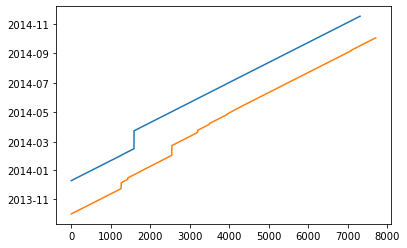

In [103]:
plt.plot(weatherFR_new['datetime'])
plt.plot(dataFR_new['datetime'])

Trial merging of PV data and weather data.

In [104]:
b = pd.merge(dataFR_new, weatherFR_new, on=['datetime'])

In [105]:
b

,Site_x,datetime,Time_x,d_m,V_MIN,V_MAX,I_GEN_MIN,I_GEN_MAX,I_IMPORT_MIN,I_IMPORT_MAX,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,Forest Road,2013-12-09 22:00:00,10:00 PM,12,244.254,245.834,0.883,0.953,0.971,1.516,...,56.0,3.2,10.9,10.41,0.0779,0.00,464.0,1.0,67.8,30.0
1,Forest Road,2013-12-09 23:00:00,11:00 PM,12,243.588,246.049,0.876,0.949,0.969,1.123,...,56.0,2.9,10.7,10.40,0.0780,0.00,703.0,1.0,100.0,30.0
2,Forest Road,2013-12-10 00:00:00,12:00 AM,12,243.614,245.499,0.881,0.974,0.977,1.095,...,56.0,2.7,10.5,10.39,0.0780,0.00,703.0,1.0,100.0,30.0
3,Forest Road,2013-12-10 01:00:00,01:00 AM,12,244.194,245.570,0.884,0.958,0.984,1.096,...,56.0,2.6,10.4,10.39,0.0781,0.00,701.0,1.0,100.0,30.0
4,Forest Road,2013-12-10 02:00:00,02:00 AM,12,243.976,246.128,0.906,0.954,0.977,1.112,...,56.0,2.4,10.2,10.38,0.0782,0.00,701.0,1.0,100.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Forest Road,2014-10-03 06:00:00,06:00 AM,10,241.084,242.461,0.858,0.877,1.138,1.175,...,57.0,11.0,19.4,10.60,0.0749,0.00,697.0,3.0,100.0,30.0
5677,Forest Road,2014-10-03 07:00:00,07:00 AM,10,240.792,243.230,0.859,1.093,1.326,13.153,...,58.0,11.3,19.6,10.75,0.0748,0.00,702.0,3.0,100.0,30.0
5678,Forest Road,2014-10-03 08:00:00,08:00 AM,10,241.843,242.688,1.086,1.554,1.397,1.638,...,58.0,11.3,19.4,10.75,0.0748,0.00,702.0,3.0,100.0,30.0
5679,Forest Road,2014-10-03 09:00:00,09:00 AM,10,241.917,242.804,1.555,4.507,1.579,4.118,...,58.0,11.3,19.4,10.75,0.0748,0.03,702.0,2.0,100.0,30.0


In [106]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 66 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site_x           5681 non-null   object 
 1   datetime         5681 non-null   object 
 2   Time_x           5681 non-null   object 
 3   d_m              5681 non-null   int64  
 4   V_MIN            5681 non-null   float64
 5   V_MAX            5681 non-null   float64
 6   I_GEN_MIN        5681 non-null   float64
 7   I_GEN_MAX        5681 non-null   float64
 8   I_IMPORT_MIN     5681 non-null   float64
 9   I_IMPORT_MAX     5681 non-null   float64
 10  P_GEN_MIN        5681 non-null   float64
 11  P_GEN_MAX        5681 non-null   float64
 12  P_IMPORT_MIN     5681 non-null   float64
 13  P_IMPORT_MAX     5681 non-null   float64
 14  Q_GEN_MIN        5681 non-null   float64
 15  Q_GEN_MAX        5681 non-null   float64
 16  Q_IMPORT_MIN     5681 non-null   float64
 17  Q_IMPORT_MAX  

In [107]:
b.columns

Index(['Site_x', 'datetime', 'Time_x', 'd_m', 'V_MIN', 'V_MAX', 'I_GEN_MIN',
       'I_GEN_MAX', 'I_IMPORT_MIN', 'I_IMPORT_MAX', 'P_GEN_MIN', 'P_GEN_MAX',
       'P_IMPORT_MIN', 'P_IMPORT_MAX', 'Q_GEN_MIN', 'Q_GEN_MAX',
       'Q_IMPORT_MIN', 'Q_IMPORT_MAX', 'S_GEN_MIN', 'S_GEN_MAX',
       'S_IMPORT_MIN', 'S_IMPORT_MAX', 'thdV_MIN', 'thdV_MAX', 'thdI_GEN_MIN',
       'thdI_GEN_MAX', 'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX', 'f_min', 'f_max',
       'Site_y', 'Date', 'Month', 'Time_y', 'TempOut', 'HiTemp', 'LowTemp',
       'OutHum', 'DewPt', 'WindSpeed', 'WindDir', 'WindRun', 'HiSpeed',
       'HiDir', 'WindChill', 'HeatIndex', 'THWIndex', 'Bar', 'Rain',
       'RainRate', 'SolarRad', 'SolarEnergy', 'HiSolarRad', 'HeatD-D',
       'CoolD-D', 'InTemp', 'InHum', 'InDew', 'InHeat', 'InEMC',
       'InAirDensity', 'ET', 'WindSamp', 'WindTx', 'ISSRecept', 'ArcInt'],
      dtype='object')

In [108]:
b[['d_m','Month']]

,d_m,Month
0,12,12.0
1,12,12.0
2,12,12.0
3,12,12.0
4,12,12.0
...,...,...
5676,10,10.0
5677,10,10.0
5678,10,10.0
5679,10,10.0


In [109]:
b[['Time_x','Time_y']]

,Time_x,Time_y
0,10:00 PM,10:00 PM
1,11:00 PM,11:00 PM
2,12:00 AM,12:00 AM
3,01:00 AM,1:00 AM
4,02:00 AM,2:00 AM
...,...,...
5676,06:00 AM,6:00 AM
5677,07:00 AM,7:00 AM
5678,08:00 AM,8:00 AM
5679,09:00 AM,9:00 AM


In [110]:
b[['Date','datetime']]

,Date,datetime
0,2013-12-09,2013-12-09 22:00:00
1,2013-12-09,2013-12-09 23:00:00
2,2013-12-10,2013-12-10 00:00:00
3,2013-12-10,2013-12-10 01:00:00
4,2013-12-10,2013-12-10 02:00:00
...,...,...
5676,2014-10-03,2014-10-03 06:00:00
5677,2014-10-03,2014-10-03 07:00:00
5678,2014-10-03,2014-10-03 08:00:00
5679,2014-10-03,2014-10-03 09:00:00


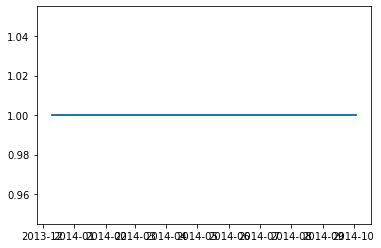

In [111]:
plt.plot(b.datetime.value_counts())

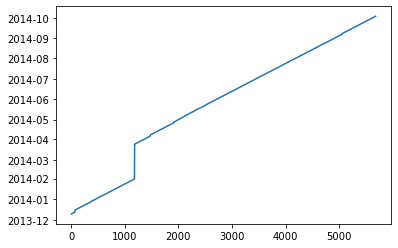

In [112]:
plt.plot(b.datetime)

Merging with removing unnecessery columns.

In [113]:
b2 = pd.merge(dataFR_new, weatherFR_new.drop(columns=['Site', 'Time','Date', 'Month']), on=['datetime'])

In [114]:
b2.head()

,Site,datetime,Time,d_m,V_MIN,V_MAX,I_GEN_MIN,I_GEN_MAX,I_IMPORT_MIN,I_IMPORT_MAX,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,Forest Road,2013-12-09 22:00:00,10:00 PM,12,244.254,245.834,0.883,0.953,0.971,1.516,...,56.0,3.2,10.9,10.41,0.0779,0.0,464.0,1.0,67.8,30.0
1,Forest Road,2013-12-09 23:00:00,11:00 PM,12,243.588,246.049,0.876,0.949,0.969,1.123,...,56.0,2.9,10.7,10.40,0.0780,0.0,703.0,1.0,100.0,30.0
2,Forest Road,2013-12-10 00:00:00,12:00 AM,12,243.614,245.499,0.881,0.974,0.977,1.095,...,56.0,2.7,10.5,10.39,0.0780,0.0,703.0,1.0,100.0,30.0
3,Forest Road,2013-12-10 01:00:00,01:00 AM,12,244.194,245.570,0.884,0.958,0.984,1.096,...,56.0,2.6,10.4,10.39,0.0781,0.0,701.0,1.0,100.0,30.0
4,Forest Road,2013-12-10 02:00:00,02:00 AM,12,243.976,246.128,0.906,0.954,0.977,1.112,...,56.0,2.4,10.2,10.38,0.0782,0.0,701.0,1.0,100.0,30.0


In [115]:
b2.columns

Index(['Site', 'datetime', 'Time', 'd_m', 'V_MIN', 'V_MAX', 'I_GEN_MIN',
       'I_GEN_MAX', 'I_IMPORT_MIN', 'I_IMPORT_MAX', 'P_GEN_MIN', 'P_GEN_MAX',
       'P_IMPORT_MIN', 'P_IMPORT_MAX', 'Q_GEN_MIN', 'Q_GEN_MAX',
       'Q_IMPORT_MIN', 'Q_IMPORT_MAX', 'S_GEN_MIN', 'S_GEN_MAX',
       'S_IMPORT_MIN', 'S_IMPORT_MAX', 'thdV_MIN', 'thdV_MAX', 'thdI_GEN_MIN',
       'thdI_GEN_MAX', 'thdI_IMPORT_MIN', 'thdI_IMPORT_MAX', 'f_min', 'f_max',
       'TempOut', 'HiTemp', 'LowTemp', 'OutHum', 'DewPt', 'WindSpeed',
       'WindDir', 'WindRun', 'HiSpeed', 'HiDir', 'WindChill', 'HeatIndex',
       'THWIndex', 'Bar', 'Rain', 'RainRate', 'SolarRad', 'SolarEnergy',
       'HiSolarRad', 'HeatD-D', 'CoolD-D', 'InTemp', 'InHum', 'InDew',
       'InHeat', 'InEMC', 'InAirDensity', 'ET', 'WindSamp', 'WindTx',
       'ISSRecept', 'ArcInt'],
      dtype='object')

In [116]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site             5681 non-null   object 
 1   datetime         5681 non-null   object 
 2   Time             5681 non-null   object 
 3   d_m              5681 non-null   int64  
 4   V_MIN            5681 non-null   float64
 5   V_MAX            5681 non-null   float64
 6   I_GEN_MIN        5681 non-null   float64
 7   I_GEN_MAX        5681 non-null   float64
 8   I_IMPORT_MIN     5681 non-null   float64
 9   I_IMPORT_MAX     5681 non-null   float64
 10  P_GEN_MIN        5681 non-null   float64
 11  P_GEN_MAX        5681 non-null   float64
 12  P_IMPORT_MIN     5681 non-null   float64
 13  P_IMPORT_MAX     5681 non-null   float64
 14  Q_GEN_MIN        5681 non-null   float64
 15  Q_GEN_MAX        5681 non-null   float64
 16  Q_IMPORT_MIN     5681 non-null   float64
 17  Q_IMPORT_MAX  

In [117]:
b2['Time']

0       10:00 PM
1       11:00 PM
2       12:00 AM
3       01:00 AM
4       02:00 AM
          ...   
5676    06:00 AM
5677    07:00 AM
5678    08:00 AM
5679    09:00 AM
5680    10:00 AM
Name: Time, Length: 5681, dtype: object

The day time have an influence on power production from PV. In above form it would be consider as catgorical feature, instead it will be chnge to int64.  

In [118]:
datetime.strptime(b2["Time"][3], '%I:%M %p').strftime('%H')

'01'

In [119]:
for i in range(b2.shape[0]):
    b2["Time"][i] = datetime.strptime(b2["Time"][i], '%I:%M %p').strftime('%H')

<ipython-input-119-cab748cfc62d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b2["Time"][i] = datetime.strptime(b2["Time"][i], '%I:%M %p').strftime('%H')


In [120]:
type(b2['Time'][0])

str

In [121]:
b2['Time'] = b2['Time'].astype(int)

In [122]:
b2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 62 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Site             5681 non-null   object 
 1   datetime         5681 non-null   object 
 2   Time             5681 non-null   int32  
 3   d_m              5681 non-null   int64  
 4   V_MIN            5681 non-null   float64
 5   V_MAX            5681 non-null   float64
 6   I_GEN_MIN        5681 non-null   float64
 7   I_GEN_MAX        5681 non-null   float64
 8   I_IMPORT_MIN     5681 non-null   float64
 9   I_IMPORT_MAX     5681 non-null   float64
 10  P_GEN_MIN        5681 non-null   float64
 11  P_GEN_MAX        5681 non-null   float64
 12  P_IMPORT_MIN     5681 non-null   float64
 13  P_IMPORT_MAX     5681 non-null   float64
 14  Q_GEN_MIN        5681 non-null   float64
 15  Q_GEN_MAX        5681 non-null   float64
 16  Q_IMPORT_MIN     5681 non-null   float64
 17  Q_IMPORT_MAX  

In [129]:
b2.rename(columns={'d_m':'Month'}, inplace=True)

In [130]:
dane_gotowe = b2.copy()

In [131]:
dane_gotowe

,Site,datetime,Time,Month,V_MIN,V_MAX,I_GEN_MIN,I_GEN_MAX,I_IMPORT_MIN,I_IMPORT_MAX,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,Forest Road,2013-12-09 22:00:00,22,12,244.254,245.834,0.883,0.953,0.971,1.516,...,56.0,3.2,10.9,10.41,0.0779,0.00,464.0,1.0,67.8,30.0
1,Forest Road,2013-12-09 23:00:00,23,12,243.588,246.049,0.876,0.949,0.969,1.123,...,56.0,2.9,10.7,10.40,0.0780,0.00,703.0,1.0,100.0,30.0
2,Forest Road,2013-12-10 00:00:00,0,12,243.614,245.499,0.881,0.974,0.977,1.095,...,56.0,2.7,10.5,10.39,0.0780,0.00,703.0,1.0,100.0,30.0
3,Forest Road,2013-12-10 01:00:00,1,12,244.194,245.570,0.884,0.958,0.984,1.096,...,56.0,2.6,10.4,10.39,0.0781,0.00,701.0,1.0,100.0,30.0
4,Forest Road,2013-12-10 02:00:00,2,12,243.976,246.128,0.906,0.954,0.977,1.112,...,56.0,2.4,10.2,10.38,0.0782,0.00,701.0,1.0,100.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Forest Road,2014-10-03 06:00:00,6,10,241.084,242.461,0.858,0.877,1.138,1.175,...,57.0,11.0,19.4,10.60,0.0749,0.00,697.0,3.0,100.0,30.0
5677,Forest Road,2014-10-03 07:00:00,7,10,240.792,243.230,0.859,1.093,1.326,13.153,...,58.0,11.3,19.6,10.75,0.0748,0.00,702.0,3.0,100.0,30.0
5678,Forest Road,2014-10-03 08:00:00,8,10,241.843,242.688,1.086,1.554,1.397,1.638,...,58.0,11.3,19.4,10.75,0.0748,0.00,702.0,3.0,100.0,30.0
5679,Forest Road,2014-10-03 09:00:00,9,10,241.917,242.804,1.555,4.507,1.579,4.118,...,58.0,11.3,19.4,10.75,0.0748,0.03,702.0,2.0,100.0,30.0


In [132]:
dane_gotowe.to_pickle('dane_gotowe.pkl')

In [133]:
dg = pd.read_pickle('dane_gotowe.pkl')

In [134]:
dg

,Site,datetime,Time,Month,V_MIN,V_MAX,I_GEN_MIN,I_GEN_MAX,I_IMPORT_MIN,I_IMPORT_MAX,...,InHum,InDew,InHeat,InEMC,InAirDensity,ET,WindSamp,WindTx,ISSRecept,ArcInt
0,Forest Road,2013-12-09 22:00:00,22,12,244.254,245.834,0.883,0.953,0.971,1.516,...,56.0,3.2,10.9,10.41,0.0779,0.00,464.0,1.0,67.8,30.0
1,Forest Road,2013-12-09 23:00:00,23,12,243.588,246.049,0.876,0.949,0.969,1.123,...,56.0,2.9,10.7,10.40,0.0780,0.00,703.0,1.0,100.0,30.0
2,Forest Road,2013-12-10 00:00:00,0,12,243.614,245.499,0.881,0.974,0.977,1.095,...,56.0,2.7,10.5,10.39,0.0780,0.00,703.0,1.0,100.0,30.0
3,Forest Road,2013-12-10 01:00:00,1,12,244.194,245.570,0.884,0.958,0.984,1.096,...,56.0,2.6,10.4,10.39,0.0781,0.00,701.0,1.0,100.0,30.0
4,Forest Road,2013-12-10 02:00:00,2,12,243.976,246.128,0.906,0.954,0.977,1.112,...,56.0,2.4,10.2,10.38,0.0782,0.00,701.0,1.0,100.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,Forest Road,2014-10-03 06:00:00,6,10,241.084,242.461,0.858,0.877,1.138,1.175,...,57.0,11.0,19.4,10.60,0.0749,0.00,697.0,3.0,100.0,30.0
5677,Forest Road,2014-10-03 07:00:00,7,10,240.792,243.230,0.859,1.093,1.326,13.153,...,58.0,11.3,19.6,10.75,0.0748,0.00,702.0,3.0,100.0,30.0
5678,Forest Road,2014-10-03 08:00:00,8,10,241.843,242.688,1.086,1.554,1.397,1.638,...,58.0,11.3,19.4,10.75,0.0748,0.00,702.0,3.0,100.0,30.0
5679,Forest Road,2014-10-03 09:00:00,9,10,241.917,242.804,1.555,4.507,1.579,4.118,...,58.0,11.3,19.4,10.75,0.0748,0.03,702.0,2.0,100.0,30.0
